In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno
from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv('MagicBricks.csv')
df.shape

(1259, 11)

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

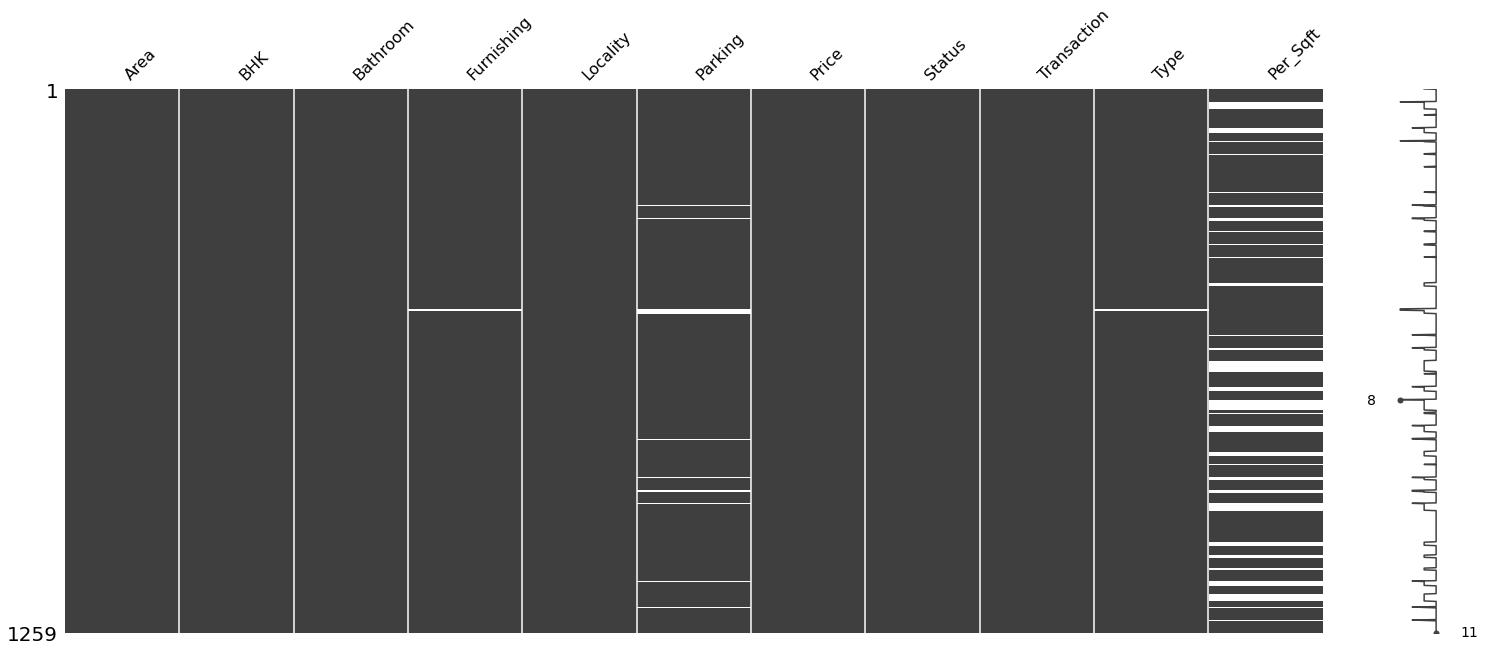

In [5]:
missingno.matrix(df)

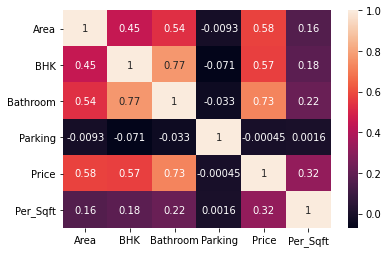

In [6]:
sns.heatmap(df.corr(), annot=True)

#### Dropping Price Per Sqft 
<br>
We need to predict price and hence price_per_sqft might be a subset of it. Since its redundant and causes multicolinearity, caio per_sqft.!
<br>
PS if rqd, we can easily fill them up using Price/Area=Price_per_sqft but isn't reqd.

In [7]:
df.drop(['Per_Sqft'], axis='columns',inplace=True)

In [8]:
df.isna().sum()

Area            0
BHK             0
Bathroom        2
Furnishing      5
Locality        0
Parking        33
Price           0
Status          0
Transaction     0
Type            5
dtype: int64

In [9]:
df.Bathroom.unique()

array([ 2.,  3.,  4.,  1., nan,  5.,  6.,  7.])

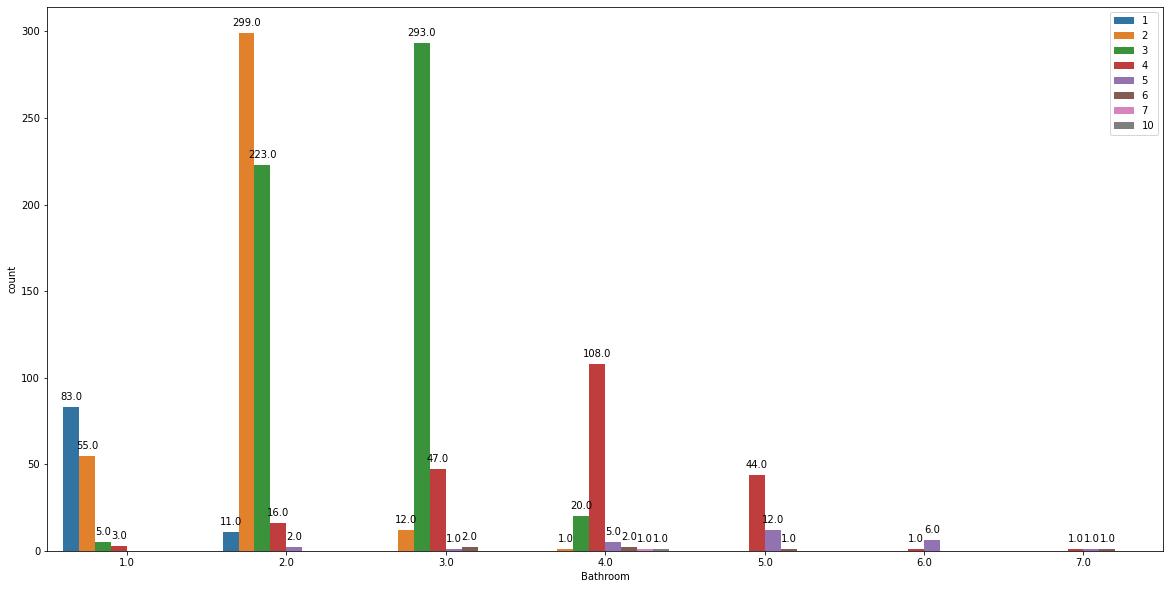

In [10]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='Bathroom',hue='BHK', data=df)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.legend(loc='upper right')

In [11]:
df[df['Bathroom'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment


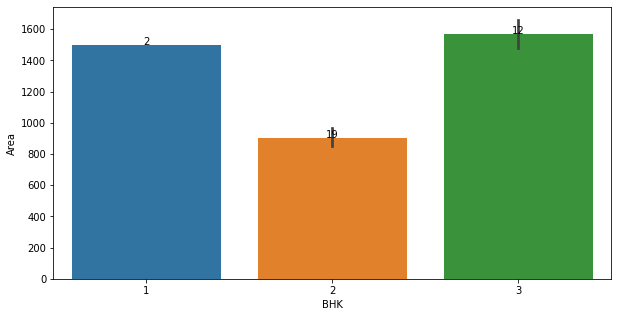

In [12]:
plt.figure(figsize=(10,5))
g = sns.barplot(x='BHK',y='Area', data=df[df['Locality'] == 'Lajpat Nagar 2'])
i=1
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1, df[df['Locality'] == 'Lajpat Nagar 2']['BHK'].value_counts()[i], ha='center')
    i += 1

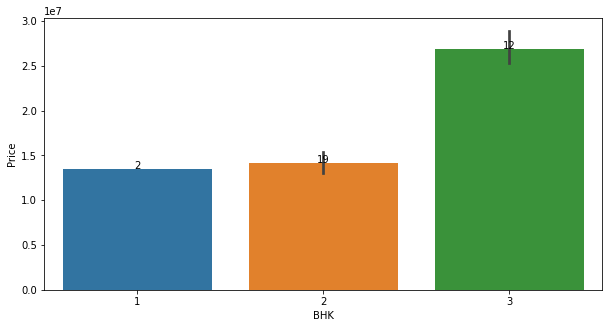

In [13]:
plt.figure(figsize=(10,5))
g = sns.barplot(x='BHK',y='Price', data=df[df['Locality'] == 'Lajpat Nagar 2'])
i=1
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 0.1, df[df['Locality'] == 'Lajpat Nagar 2']['BHK'].value_counts()[i], ha='center')
    i += 1

In [14]:
df[(df['Locality'] == 'Lajpat Nagar 2') & (df['BHK'] == 1)]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment


#### Missing Bathroom Dilemma
Both entries where Bathroom is missing is 1BHK.  Most likely that would have 1 Bathroom. On the contrary, it has a huge area so having 2 bathrooms is a possibility. Since there is not much data, dropping them probably is not a good idea. Lets fill them as 2.

In [15]:
df.Bathroom.fillna(2,inplace=True)

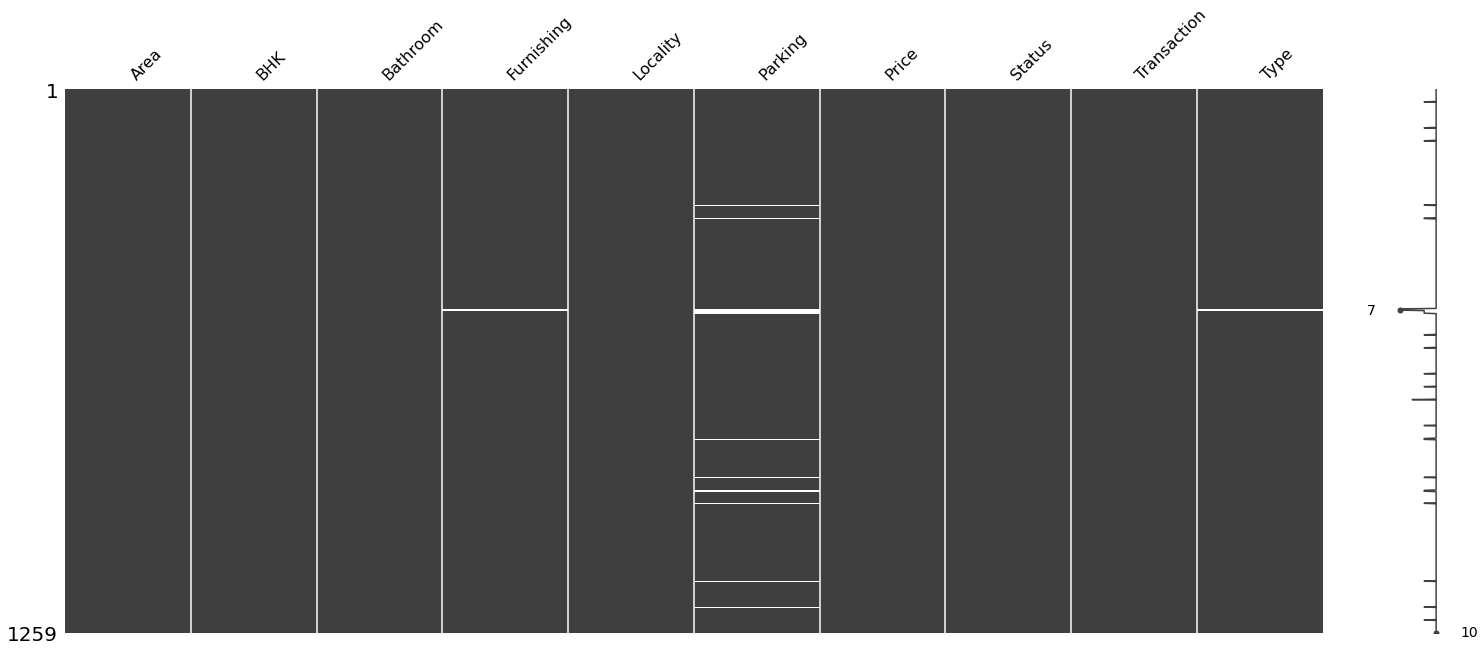

In [16]:
missingno.matrix(df)

#### Missing Parking Values
Probably missing parking values means no parking and hence 0

In [17]:
df.Parking.fillna(0,inplace=True)

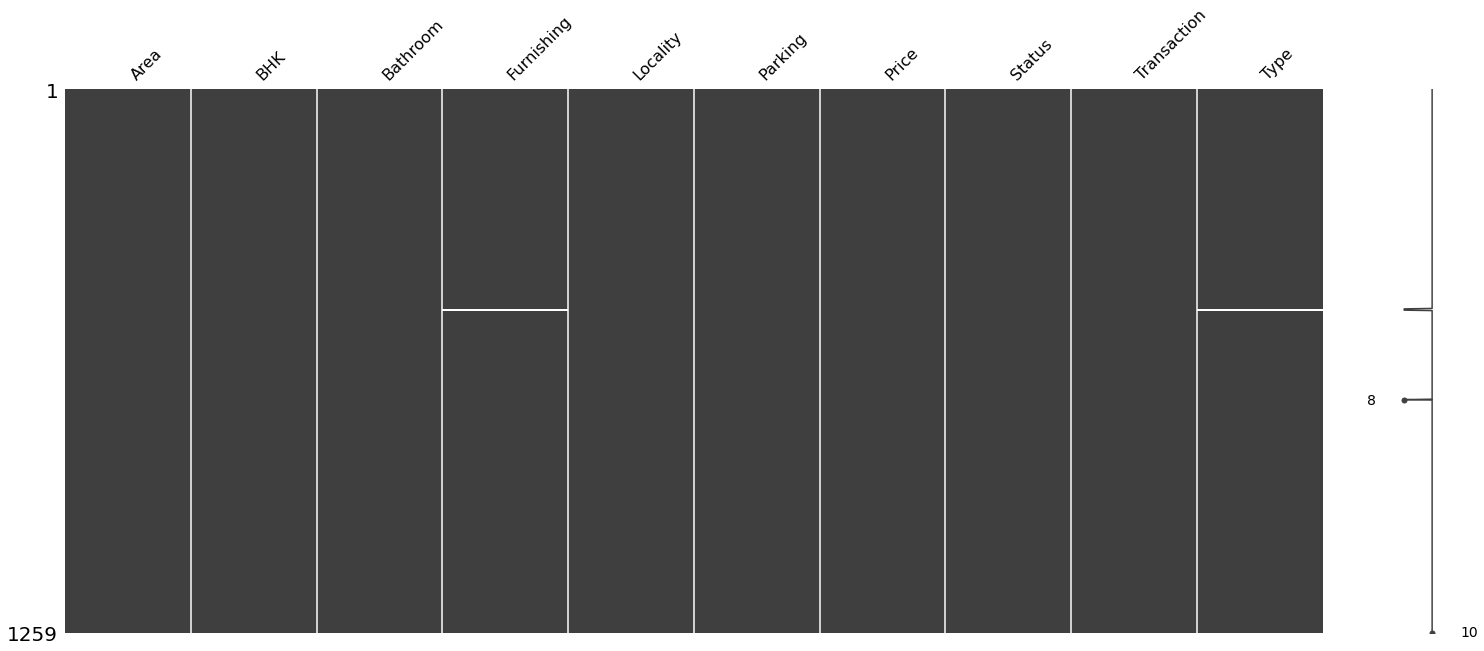

In [18]:
missingno.matrix(df)

In [19]:
df[df['Furnishing'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN
719,1500.0,3,2.0,NaN,"Sarita Vihar, Mathura Road carpet area 1500 sq...",1.0,13500000,Ready_to_move,Resale,NaN


In [20]:
df.iloc[719,4]

'Sarita Vihar, Mathura Road carpet area 1500 sqft status Ready to Move floor 2 out of 4 floors transaction Resale ownership Freehold overlooking Main Road car parking 1 Open bathroom 2 balcony 2 furnishing Unfurnished For sale second third duplex .spacious 3 bedrooms with 2 washrooms drawing and dining and moduler kitchen one scooter garrage. read more Contact Agent View Phone No. Share Feedback Shree Balaji Real Estate Pvt. Ltd. Has Maximum Property Options Is the Top Agent of the Locality Is Trusted by All Users 21 Property Options in Sarita Vihar, Mathura Road Shree Balaji Real Estate Pvt. Ltd. Certified Agent Locality Superstar Maximum options in Sarita Vihar, Mathura Road'

#### Woah! They had information hidden for this one!
Apparently, Furnishing is 'Unfurnished' and Type is 'Builder Floor'

In [21]:
df.iloc[719,3] = 'Unfurnished'
df.iloc[719,9] = 'Builder_Floor'

In [22]:
df[df['Furnishing'].isna()]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN


In [23]:
df[df['Locality'] == 'Gandhi Nagar, Shahdara']

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,2900000,Ready_to_move,Resale,NaN
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,17000000,Ready_to_move,Resale,NaN
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",0.0,25000000,Ready_to_move,Resale,NaN
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",0.0,10000000,Ready_to_move,Resale,NaN


All of the entries for Gandhi Nagar, Shahdara ie 4 have NaN in Furnishing.! Also These are the 4 entries where Type is missing too.!

Text(0.5, 1.0, 'Read_to_move')

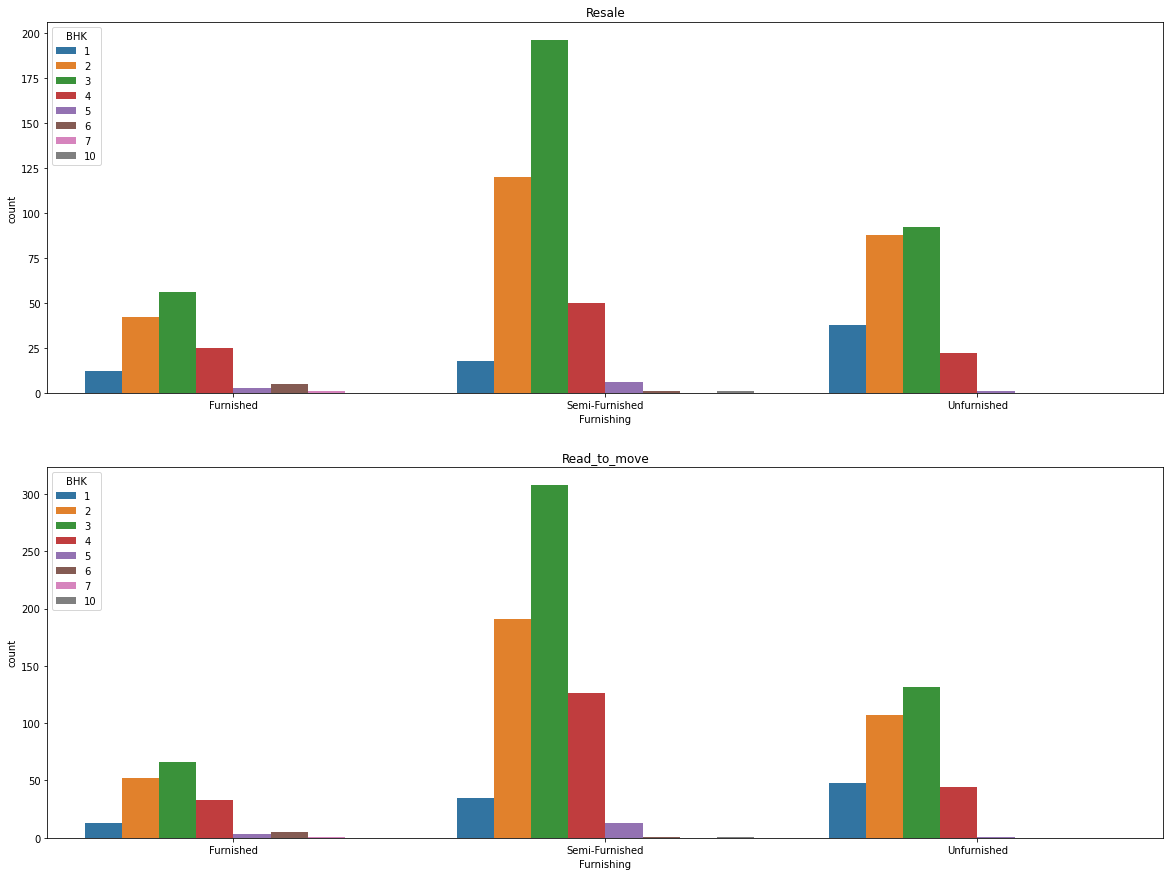

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.countplot(x='Furnishing',hue='BHK', data = df[df['Transaction']=='Resale'].sort_values(by='Furnishing'))
plt.title('Resale')
plt.subplot(2,1,2)
sns.countplot(x='Furnishing',hue='BHK', data = df[df['Status']=='Ready_to_move'].sort_values(by='Furnishing'))
plt.title('Read_to_move')

Looks like we can settle up on Semi Furnished.

In [25]:
df.Furnishing.fillna('Semi-Furnished',inplace=True)

Text(0.5, 1.0, 'Ready To Move')

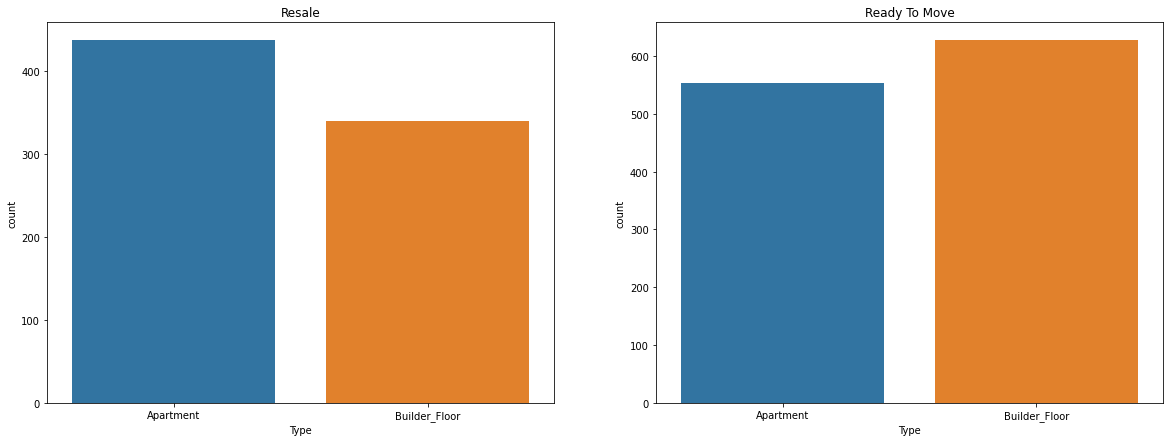

In [26]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x='Type', data = df[df['Transaction']=='Resale'].sort_values(by='Type'))
plt.title('Resale')
plt.subplot(1,2,2)
sns.countplot(x='Type', data = df[df['Status']=='Ready_to_move'].sort_values(by='Type'))
plt.title('Ready To Move')

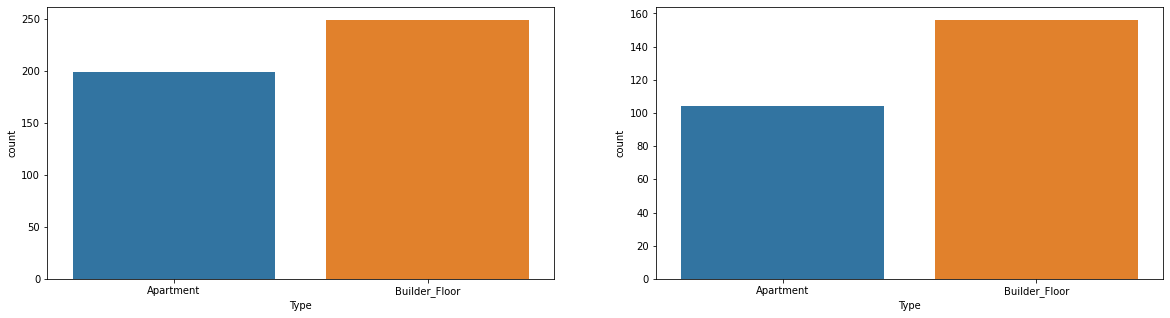

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='Type', data = df[(df['Furnishing']=='Semi-Furnished') & (df['Area']>=1000)].sort_values(by='Type'))
plt.subplot(1,2,2)
sns.countplot(x='Type', data = df[(df['Furnishing']=='Semi-Furnished') & (df['Area']<1000)].sort_values(by='Type'))

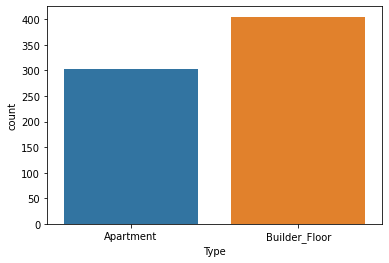

In [28]:
sns.countplot(x='Type', data = df[df['Furnishing']=='Semi-Furnished'].sort_values(by='Type'))

Looks like we can settle up on Builder Floor!

In [29]:
df.Type.fillna('Builder_Floor',inplace=True)

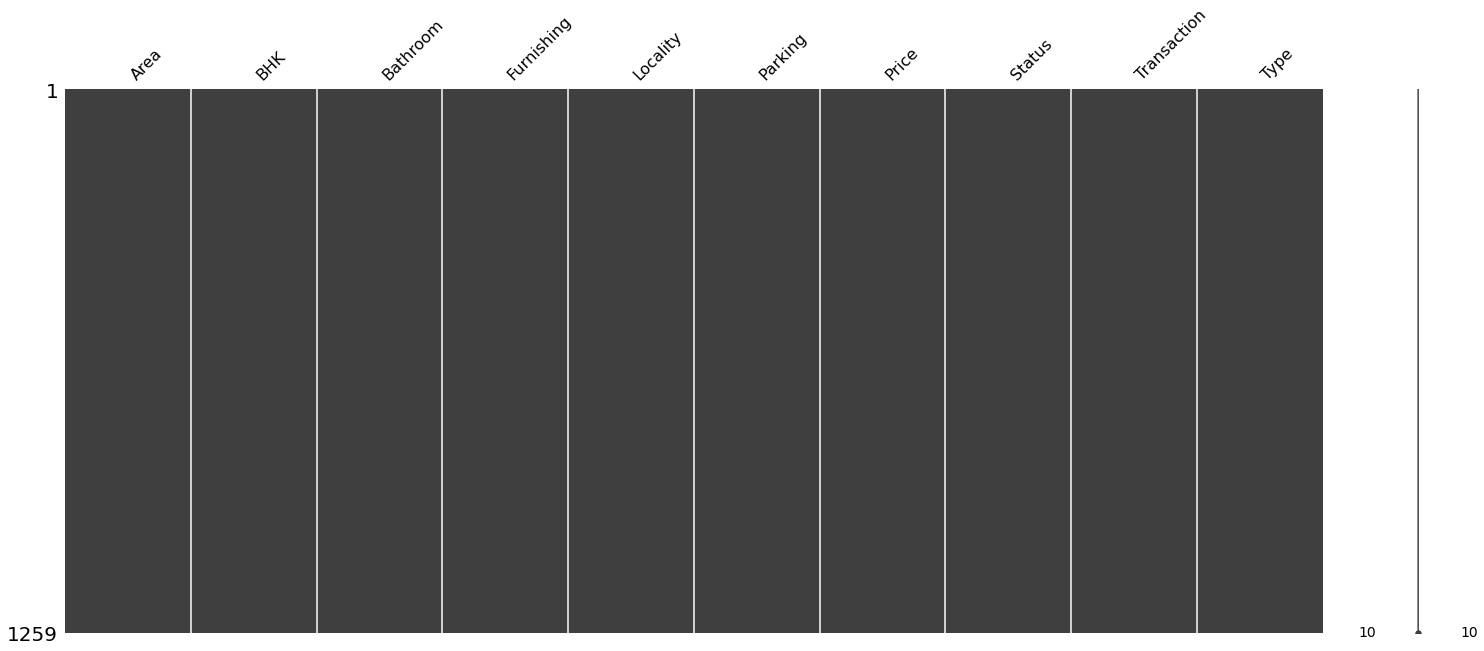

In [30]:
missingno.matrix(df)

In [37]:
tdf = df.copy()
tdf[tdf['Parking']>20]
tdf = tdf.drop(index = [875,876,877,878,879,880,881,882,969,970,971])

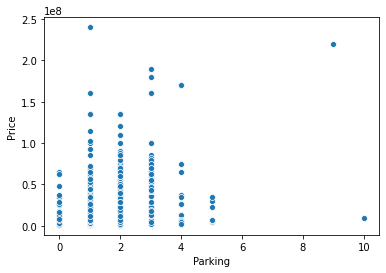

In [38]:
sns.scatterplot(x='Parking',y='Price',data=tdf)